In [13]:
import pandas as pd

operating_system = 'mac'

if operating_system == 'win':
    path = 'C:/Users/fabau/OneDrive/Documents/GitHub/master-project/'
else:
    path = '/Users/fabienaugsburger/Documents/GitHub/master-project/'

def split_variable_level(variable_with_level):
    parts = variable_with_level.rsplit('_', 1)
    if len(parts) == 2 and parts[1].isdigit():
        return parts[0], parts[1]
    else:
        return variable_with_level, 0

# Read the list of variables
name_of_variables = pd.read_csv(f'{path}variable_list_24_v5.csv')
#name_of_variables = name_of_variables['variable'].tolist()

# Define the dataset to use
dataset = 'datasets_1h_EU'
missing = []
type_of_dataset = 1 # this control whether the variables have all the storms one after the other or not, 0 being yes and 1 being no

# Create a new list of variables
#new_name_of_variables = []
for idx, row in name_of_variables.iterrows():
    variable = split_variable_level(row['variables'])[0]
    level = split_variable_level(row['variables'])[1]
    print(variable, level)

    locals()[f'max_{variable}_{level}'] = pd.DataFrame()
    locals()[f'min_{variable}_{level}'] = pd.DataFrame()
    locals()[f'mean_{variable}_{level}'] = pd.DataFrame()
    locals()[f'sigma_{variable}_{level}'] = pd.DataFrame()

    for j in range(1, 96 + 1):
    #if level == 'pl':
        #for lvl in level:
            try:
                    df_max_temp = pd.read_csv(f'{path}DATASETS/{dataset}/{variable}/storm_{j}/max_{j}_{level}.csv')
                    df_min_temp = pd.read_csv(f'{path}DATASETS/{dataset}/{variable}/storm_{j}/min_{j}_{level}.csv')
                    df_mean_temp = pd.read_csv(f'{path}DATASETS/{dataset}/{variable}/storm_{j}/mean_{j}_{level}.csv')
                    df_sigma_temp = pd.read_csv(f'{path}DATASETS/{dataset}/{variable}/storm_{j}/std_{j}_{level}.csv')
                    #print(f'File for storm {j} and variable {variable} found.')
            except FileNotFoundError:
                ds_missing = missing.append(f'{variable}_{level}')
                #print(f"File for storm {j}, variable {variable}, and level {level} not found.")
                continue
                    # Check if the columns exist before dropping/renaming
            if 'Unnamed: 0' in df_max_temp.columns:
                df_max_temp = df_max_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_min_temp.columns:
                df_min_temp = df_min_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_mean_temp.columns:
                df_mean_temp = df_mean_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_sigma_temp.columns:
                df_sigma_temp = df_sigma_temp.drop(columns=['Unnamed: 0'])

            if type_of_dataset == 1:

                if '0' in df_max_temp.columns:
                    df_max_temp = df_max_temp.rename(columns={'0': f'storm_{j}'})
                if '0' in df_min_temp.columns:
                    df_min_temp = df_min_temp.rename(columns={'0': f'storm_{j}'})
                if '0' in df_mean_temp.columns:
                    df_mean_temp = df_mean_temp.rename(columns={'0': f'storm_{j}'})
                if '0' in df_sigma_temp.columns:
                    df_sigma_temp = df_sigma_temp.rename(columns={'0': f'storm_{j}'})
                else:
                    continue

            locals()[f'max_{variable}_{level}'] = pd.concat([locals()[f'max_{variable}_{level}'], df_max_temp], axis=type_of_dataset)
            locals()[f'min_{variable}_{level}'] = pd.concat([locals()[f'min_{variable}_{level}'], df_min_temp], axis=type_of_dataset)
            locals()[f'mean_{variable}_{level}'] = pd.concat([locals()[f'mean_{variable}_{level}'], df_mean_temp], axis=type_of_dataset)
            locals()[f'sigma_{variable}_{level}'] = pd.concat([locals()[f'sigma_{variable}_{level}'], df_sigma_temp], axis=type_of_dataset)

'''        else:
            try:
                    df_max_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/max_{j}_0.csv')
                    df_min_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/min_{j}_0.csv')
                    df_mean_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/mean_{j}_0.csv')
                    df_sigma_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/std_{j}_0.csv')
                    #print(f'File for storm {j} and variable {variable} found.')
            except FileNotFoundError:
                ds_missing = missing.append(f'{variable}_{level}')
                #print(f"File for storm {j}, variable {variable}, and level {level} not found.")
                continue
            # Check if the columns exist before dropping/renaming
            if 'Unnamed: 0' in df_max_temp.columns:
                df_max_temp = df_max_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_min_temp.columns:
                df_min_temp = df_min_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_mean_temp.columns:
                df_mean_temp = df_mean_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_sigma_temp.columns:
                df_sigma_temp = df_sigma_temp.drop(columns=['Unnamed: 0'])

            if '0' in df_max_temp.columns:
                df_max_temp = df_max_temp.rename(columns={'0': f'storm_{j}_level_0'})
            if '0' in df_min_temp.columns:
                df_min_temp = df_min_temp.rename(columns={'0': f'storm_{j}_level_0'})
            if '0' in df_mean_temp.columns:
                df_mean_temp = df_mean_temp.rename(columns={'0': f'storm_{j}_level_0'})
            if '0' in df_sigma_temp.columns:
                df_sigma_temp = df_sigma_temp.rename(columns={'0': f'storm_{j}_level_0'})

            locals()[f'max_{variable}'] = pd.concat([locals()[f'max_{variable}'], df_max_temp], axis=1)
            locals()[f'min_{variable}'] = pd.concat([locals()[f'min_{variable}'], df_min_temp], axis=1)
            locals()[f'mean_{variable}'] = pd.concat([locals()[f'mean_{variable}'], df_mean_temp], axis=1)
            locals()[f'sigma_{variable}'] = pd.concat([locals()[f'sigma_{variable}'], df_sigma_temp], axis=1)'''

10m_u_component_of_wind 0
10m_v_component_of_wind 0
2m_dewpoint_temperature 0
2m_temperature 0
convective_available_potential_energy 0
convective_precipitation 0
convective_rain_rate 0
convective_snowfall 0
geopotential 500
geopotential 1000
high_cloud_cover 0
instantaneous_10m_wind_gust 0
k_index 0
large_scale_precipitation 0
large_scale_snowfall 0
mean_large_scale_precipitation_rate 0
mean_top_net_long_wave_radiation_flux 0
mean_top_net_short_wave_radiation_flux 0
mean_total_precipitation_rate 0
mean_sea_level_pressure 0
mean_surface_latent_heat_flux 0
mean_surface_net_long_wave_radiation_flux 0
mean_surface_net_short_wave_radiation_flux 0
mean_vertically_integrated_moisture_divergence 0
relative_humidity 10
relative_humidity 20
relative_humidity 30
relative_humidity 50
relative_humidity 70
relative_humidity 100
relative_humidity 150
relative_humidity 200
relative_humidity 250
relative_humidity 300
relative_humidity 400
relative_humidity 500
relative_humidity 600
relative_humidity 70

'        else:\n            try:\n                    df_max_temp = pd.read_csv(f\'{path}{dataset}/{variable}/storm_{j}/max_{j}_0.csv\')\n                    df_min_temp = pd.read_csv(f\'{path}{dataset}/{variable}/storm_{j}/min_{j}_0.csv\')\n                    df_mean_temp = pd.read_csv(f\'{path}{dataset}/{variable}/storm_{j}/mean_{j}_0.csv\')\n                    df_sigma_temp = pd.read_csv(f\'{path}{dataset}/{variable}/storm_{j}/std_{j}_0.csv\')\n                    #print(f\'File for storm {j} and variable {variable} found.\')\n            except FileNotFoundError:\n                ds_missing = missing.append(f\'{variable}_{level}\')\n                #print(f"File for storm {j}, variable {variable}, and level {level} not found.")\n                continue\n            # Check if the columns exist before dropping/renaming\n            if \'Unnamed: 0\' in df_max_temp.columns:\n                df_max_temp = df_max_temp.drop(columns=[\'Unnamed: 0\'])\n            if \'Unnamed: 0\' in 

In [16]:
# check if storms in tracks_1h_EU are continuous with the column timestep
index_storm_EU = []
for i in range(0, 96):
    locals()[f'storm_{i+1}'] = pd.read_csv(f'{path}tracks_square_storm/ALL_TRACKS/tracks_1h_EU/storm_{i+1}.csv')
    try:
        if locals()[f'storm_{i+1}']['timestep'].values.max() -locals()[f'storm_{i+1}']['timestep'].values.min() == len(locals()[f'storm_{i+1}'])-1:
            print(f'Storm {i} is continuous.')
            index_storm_EU.append(i)
        else:
            print(f'Storm {i} is not continuous.')
    except ValueError:
        print(f'Storm {i} is empty.')


Storm 0 is not continuous.
Storm 1 is continuous.
Storm 2 is continuous.
Storm 3 is continuous.
Storm 4 is continuous.
Storm 5 is continuous.
Storm 6 is continuous.
Storm 7 is continuous.
Storm 8 is continuous.
Storm 9 is continuous.
Storm 10 is continuous.
Storm 11 is continuous.
Storm 12 is continuous.
Storm 13 is continuous.
Storm 14 is continuous.
Storm 15 is continuous.
Storm 16 is continuous.
Storm 17 is continuous.
Storm 18 is continuous.
Storm 19 is continuous.
Storm 20 is continuous.
Storm 21 is continuous.
Storm 22 is continuous.
Storm 23 is continuous.
Storm 24 is continuous.
Storm 25 is not continuous.
Storm 26 is continuous.
Storm 27 is continuous.
Storm 28 is continuous.
Storm 29 is continuous.
Storm 30 is continuous.
Storm 31 is continuous.
Storm 32 is continuous.
Storm 33 is continuous.
Storm 34 is not continuous.
Storm 35 is continuous.
Storm 36 is continuous.
Storm 37 is continuous.
Storm 38 is continuous.
Storm 39 is continuous.
Storm 40 is continuous.
Storm 41 is co

In [17]:
import numpy as np
import pandas as pd

# Dataset
operating_system = 'mac'
if operating_system == 'win':
    path = 'C:/Users/fabau/OneDrive/Documents/GitHub/master-project/'
else:
    path = '/Users/fabienaugsburger/Documents/GitHub/master-project/'
dataset = 'datasets_1h_EU'

if dataset == 'datasets_1h' or dataset == 'datasets_1h_EU':
    col_max = '1_hour_steps'
else:
    col_max = '3_hour_steps'

name_of_variables = pd.read_csv(f'{path}variable_list_24_v5.csv')

max_time_steps = pd.read_csv(f'{path}tracks_square_storm/storms_with_steps_and_index_ordered.csv',
                             delimiter=';', index_col=0)
if dataset == 'datasets_1h' or dataset == 'datasets_1h_EU':
    max_time_steps = 185
else:
    max_time_steps = 62
#max_time_steps = 185 # max_time_steps[col_max].max()+1

def split_variable_level(variable_with_level):
    parts = variable_with_level.rsplit('_', 1)
    if len(parts) == 2 and parts[1].isdigit():
        return parts[0], parts[1]
    else:
        return variable_with_level, 0

# Initialize the list to hold the data for each storm
data_list = []

for storm_idx in range(1,97):
    storm_data = []
    for var_name, row in name_of_variables.iterrows():
        var_name = split_variable_level(row['variables'])[0]
        level = split_variable_level(row['variables'])[1]
        try:
            df = pd.read_csv(f'{path}/DATASETS/{dataset}/{var_name}/storm_{storm_idx}/mean_{storm_idx}_{level}.csv') #locals()[f'mean_{var_name}_{level}']
            if df.shape[0] > 0:  # Check if the csv is not empty
                storm_series = df.loc[:, '0'].values
                storm_data.append(storm_series)
            else:
                print(f"Storm {storm_idx} not found in {var_name} for level {level}")
                storm_data.append(np.array([]))  # Append an empty array if the storm index does not exist
        except KeyError:
            storm_data.append(np.array([]))  # Append an empty array if the variable is not found

    # Find the maximum length of time steps for the current storm
    #max_time_steps = max(len(series) for series in storm_data)

    # Pad the data to have the same length of time steps
    storm_data_padded = [np.pad(series, (0, max_time_steps - len(series)), 'constant', constant_values=np.nan) for series in storm_data]
    #storm_data_padded = []
    #for series in storm_data:
    #    padded_series = np.pad(series, (0, max_time_steps - len(series)), 'constant', constant_values=np.nan)
    #    storm_data_padded.append(padded_series)

    # Stack the variables together and add to the list
    data_list.append(np.stack(storm_data_padded, axis=1))

# Convert the list to a 3D numpy array
X_all_3d = np.stack(data_list, axis=0)

print("Shape of the 3D ndarray:", X_all_3d.shape)

Storm 91 not found in 10m_u_component_of_wind for level 0
Storm 91 not found in 10m_v_component_of_wind for level 0
Storm 91 not found in 2m_dewpoint_temperature for level 0
Storm 91 not found in 2m_temperature for level 0
Storm 91 not found in convective_available_potential_energy for level 0
Storm 91 not found in convective_precipitation for level 0
Storm 91 not found in convective_rain_rate for level 0
Storm 91 not found in convective_snowfall for level 0
Storm 91 not found in geopotential for level 500
Storm 91 not found in geopotential for level 1000
Storm 91 not found in high_cloud_cover for level 0
Storm 91 not found in instantaneous_10m_wind_gust for level 0
Storm 91 not found in k_index for level 0
Storm 91 not found in large_scale_precipitation for level 0
Storm 91 not found in large_scale_snowfall for level 0
Storm 91 not found in mean_large_scale_precipitation_rate for level 0
Storm 91 not found in mean_top_net_long_wave_radiation_flux for level 0
Storm 91 not found in mean

In [22]:
max_time_steps - len(storm_data)

116

In [10]:
# Example variable name to separate
variable_to_separate = "instantaneous_10m_wind_gust"
list_var = name_of_variables['variables'].tolist()

# Find the index of the variable in the variable_names list
variable_index = list_var.index(variable_to_separate)

# Extract the variable into a separate 2D array
separated_variable = X_all_3d[:, :, variable_index]

# Remove the variable from the original 3D ndarray
data_3d_reduced = np.delete(X_all_3d, variable_index, axis=2)

# Print the shapes of the separated variable and the reduced ndarray
print("Shape of the separated variable:", separated_variable.shape)
print("Shape of the reduced 3D ndarray:", data_3d_reduced.shape)

Shape of the separated variable: (96, 185)
Shape of the reduced 3D ndarray: (96, 185, 79)


In [9]:
print('index EU',index_storm_EU)
print('index all', storm_index_all)

NameError: name 'index_storm_EU' is not defined

In [18]:
storm_index_test_valid = [0, 3, 4, 11, 13, 14, 17, 20, 25, 27, 28, 29, 31, 35, 53, 54, 57, 64, 69, 71, 75, 81, 85, 86, 87, 90, 92, 93, 95]
storm_index_validation = [3, 4, 11, 17, 31, 35, 54, 86, 87, 92]
storm_index_all = range(96)

# remove index of storm in the test set from the validation set

storm_index_test = [x for x in storm_index_test_valid if x not in storm_index_validation]

# remove index of storm in the valdation set from the test set

storm_index_validation = [x for x in storm_index_validation if x not in storm_index_test]

# remove index of storm in the training set from the validation set and validation set

storm_index_training = [x for x in storm_index_all if x not in storm_index_test_valid]

print(storm_index_validation, storm_index_test)
print(storm_index_training)

storm_index_training = [x for x in storm_index_training if x in index_storm_EU]
storm_index_validation = [x for x in storm_index_validation if x in index_storm_EU]
storm_index_test = [x for x in storm_index_test if x in index_storm_EU]

print("Validation indices:", storm_index_validation)
print("Test indices:", storm_index_test)
print("Training indices:", storm_index_training)

[3, 4, 11, 17, 31, 35, 54, 86, 87, 92] [0, 13, 14, 20, 25, 27, 28, 29, 53, 57, 64, 69, 71, 75, 81, 85, 90, 93, 95]
[1, 2, 5, 6, 7, 8, 9, 10, 12, 15, 16, 18, 19, 21, 22, 23, 24, 26, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 56, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 70, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 88, 89, 91, 94]
Validation indices: [3, 4, 11, 17, 31, 35, 54, 86, 87, 92]
Test indices: [13, 14, 20, 27, 28, 29, 53, 57, 64, 69, 71, 75, 81, 85, 93, 95]
Training indices: [1, 2, 5, 6, 7, 8, 9, 10, 12, 15, 16, 18, 19, 21, 22, 23, 24, 26, 30, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 56, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 70, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 88, 89, 91]


In [19]:
for i in range(len(index_storm_EU)):
    storm_n = i
    print(X_all_3d[storm_n].shape, np.isnan(X_all_3d[storm_n]).sum())

(185, 80) 10480
(185, 80) 6480
(185, 80) 8480
(185, 80) 14320
(185, 80) 9440
(185, 80) 7760
(185, 80) 8560
(185, 80) 5280
(185, 80) 9280
(185, 80) 8080
(185, 80) 3280
(185, 80) 7360
(185, 80) 8400
(185, 80) 10720
(185, 80) 7280
(185, 80) 4480
(185, 80) 8160
(185, 80) 12560
(185, 80) 7360
(185, 80) 7360
(185, 80) 8800
(185, 80) 7600
(185, 80) 12160
(185, 80) 12800
(185, 80) 13600
(185, 80) 8800
(185, 80) 8000
(185, 80) 6080
(185, 80) 6480
(185, 80) 9040
(185, 80) 12160
(185, 80) 11120
(185, 80) 11840
(185, 80) 8560
(185, 80) 7760
(185, 80) 9920
(185, 80) 7920
(185, 80) 13680
(185, 80) 5520
(185, 80) 4960
(185, 80) 11680
(185, 80) 7120
(185, 80) 8880
(185, 80) 6960
(185, 80) 5600
(185, 80) 6320
(185, 80) 8640
(185, 80) 2960
(185, 80) 4560
(185, 80) 9920
(185, 80) 2960
(185, 80) 7760
(185, 80) 10160
(185, 80) 9120
(185, 80) 8320
(185, 80) 11440
(185, 80) 10560
(185, 80) 9920
(185, 80) 13520
(185, 80) 5120
(185, 80) 8480
(185, 80) 10800
(185, 80) 12960
(185, 80) 7440
(185, 80) 0
(185, 80) 

In [20]:
# extract the data for the test set and the validation set
number_storm =  range(len(index_storm_EU))

X_test = X_all_3d[storm_index_test,:,:]
X_validation = X_all_3d[storm_index_validation,:,:]
X_train = X_all_3d[storm_index_training,:,:]

# separate the variable to predict
variable_to_separate = "instantaneous_10m_wind_gust"
list_var = name_of_variables['variables'].tolist()

# Find the index of the variable in the variable_names list
variable_index = list_var.index(variable_to_separate)

y_test = X_test[:,:,variable_index]
y_validation = X_validation[:,:,variable_index]
y_train = X_train[:,:,variable_index]

# remove the variable to predict from the data

X_test = np.delete(X_test, variable_index, axis=2)
X_validation = np.delete(X_validation, variable_index, axis=2)
X_train = np.delete(X_train, variable_index, axis=2)

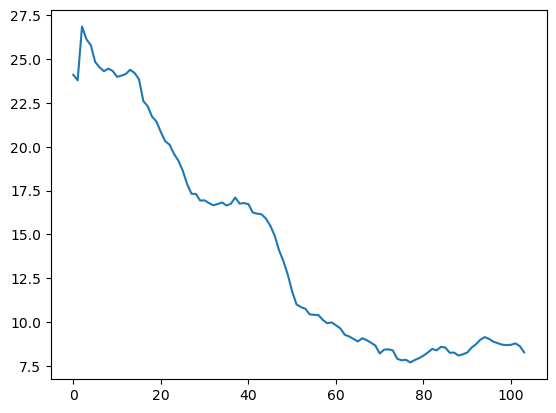

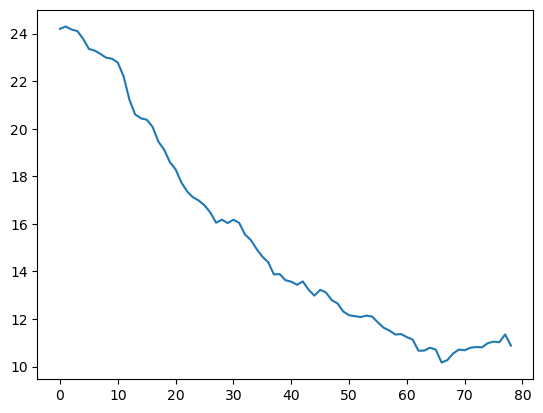

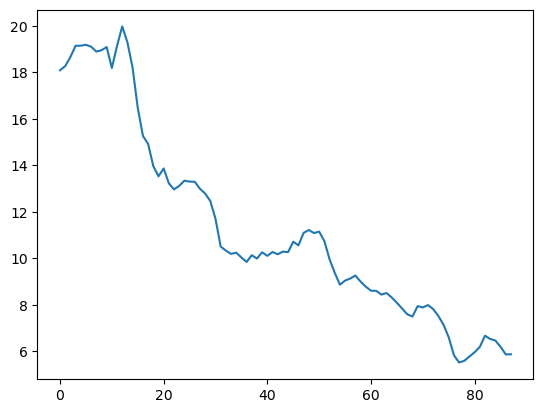

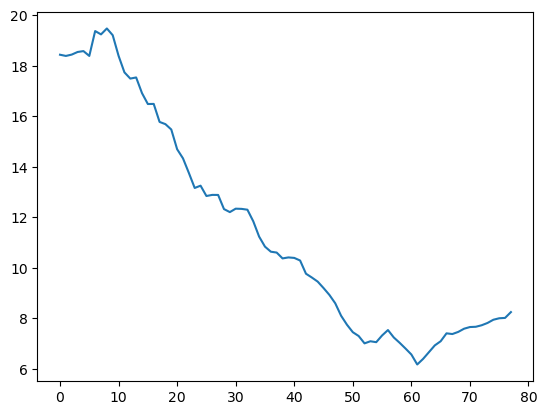

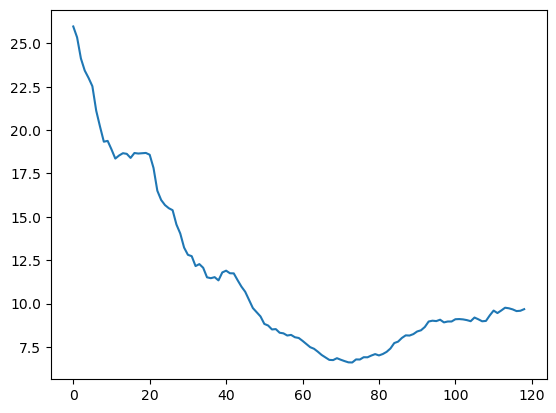

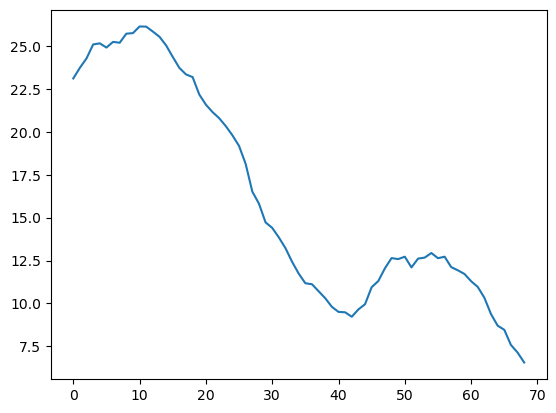

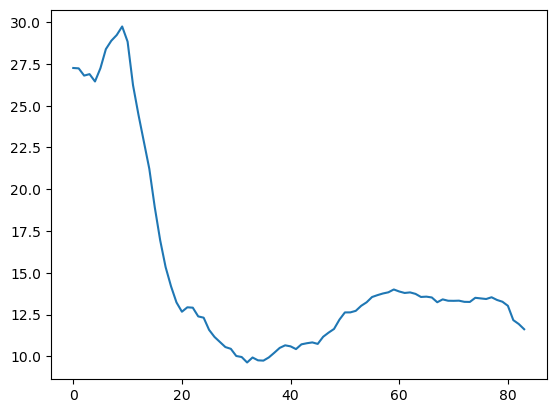

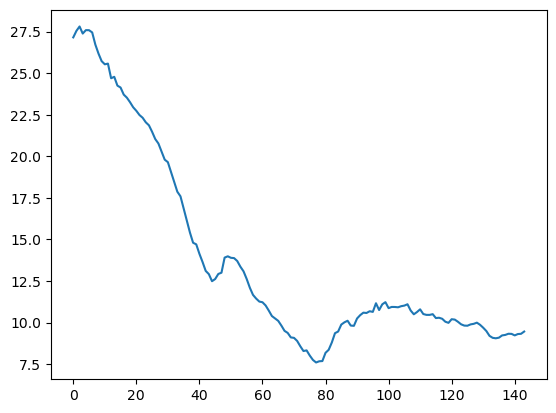

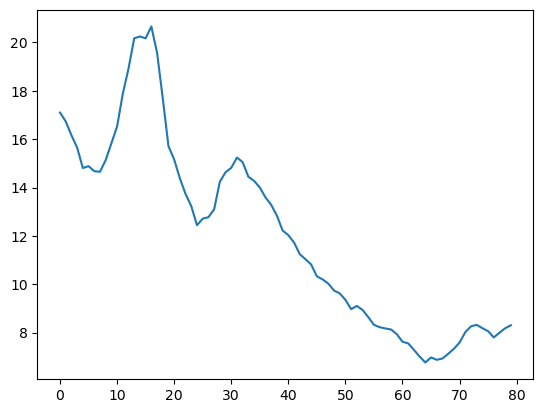

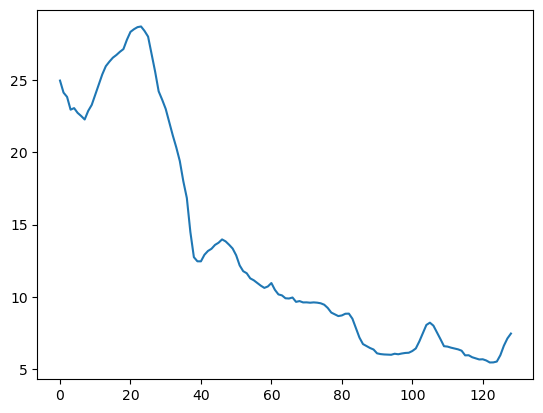

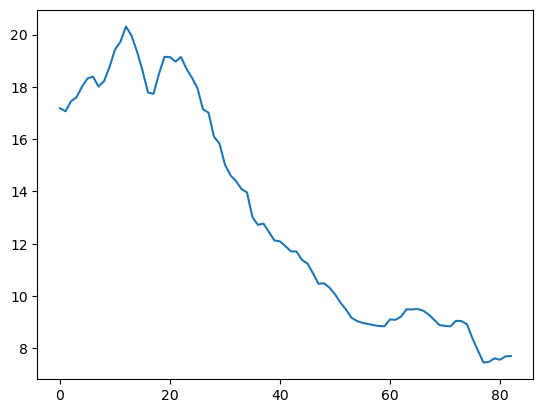

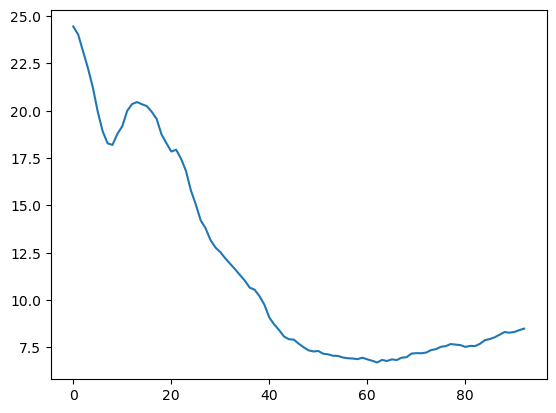

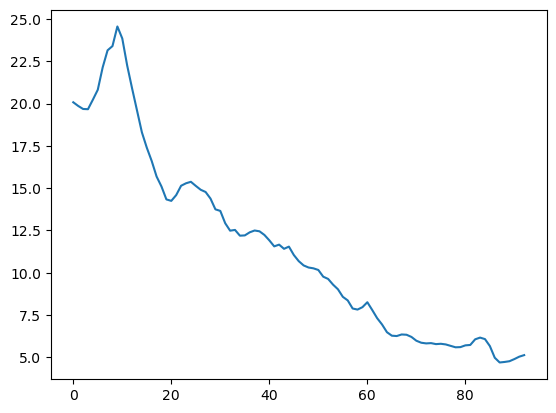

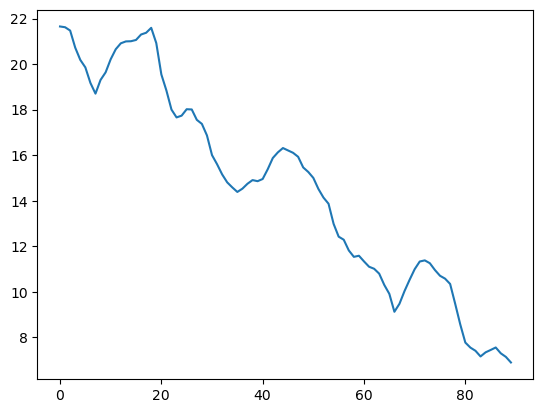

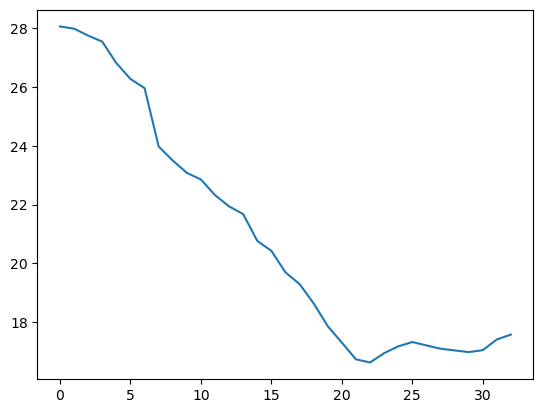

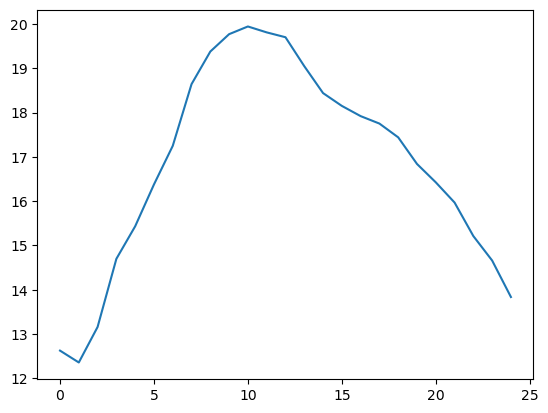

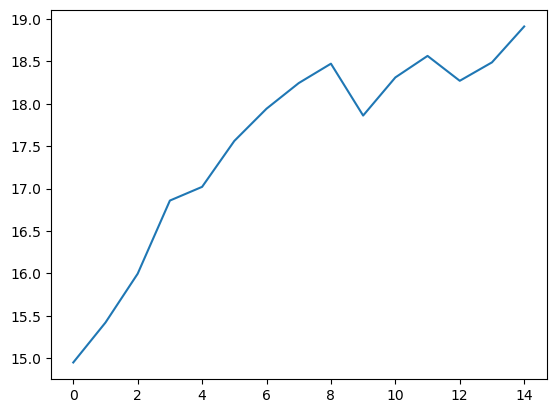

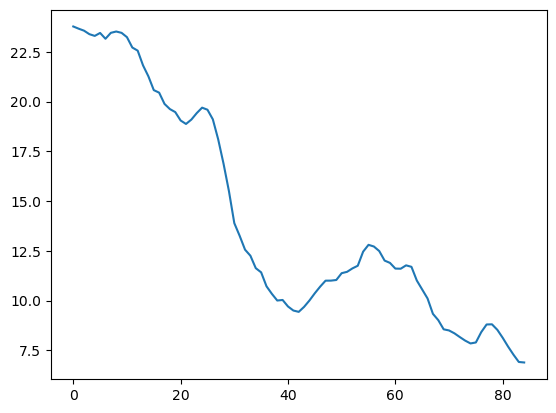

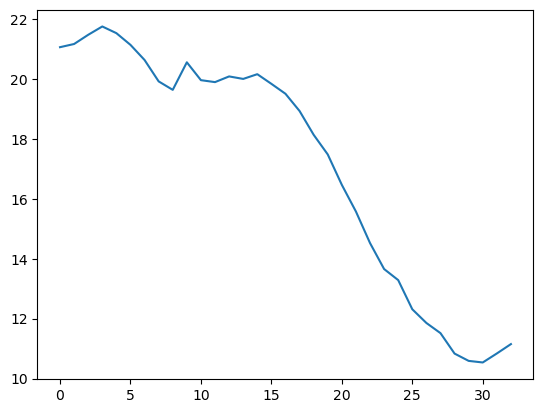

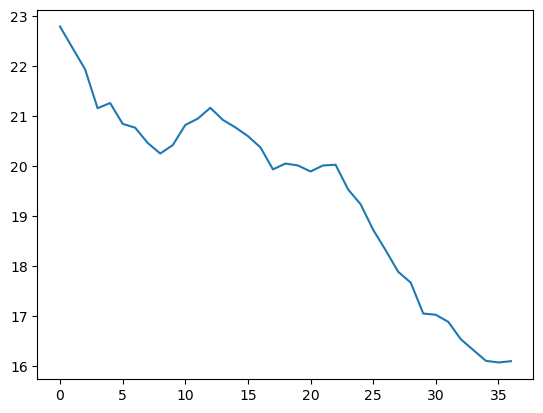

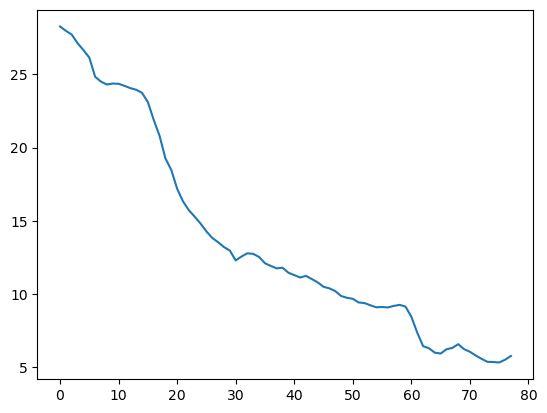

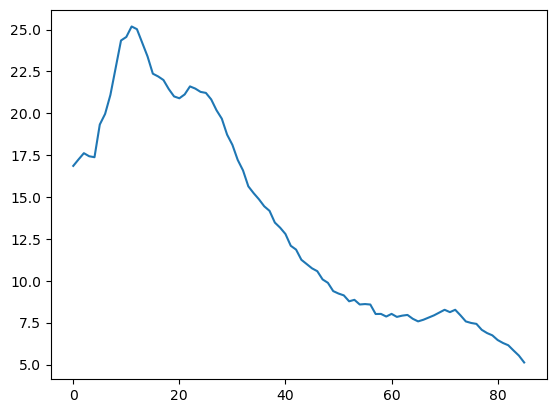

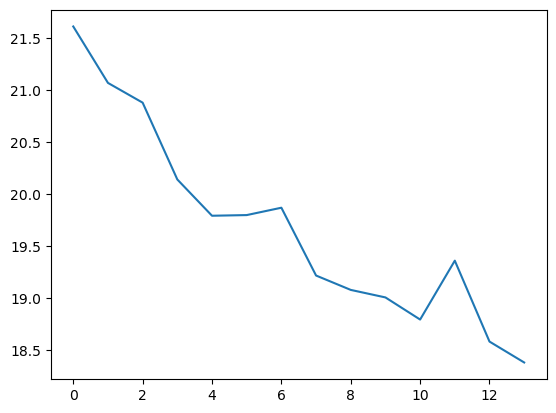

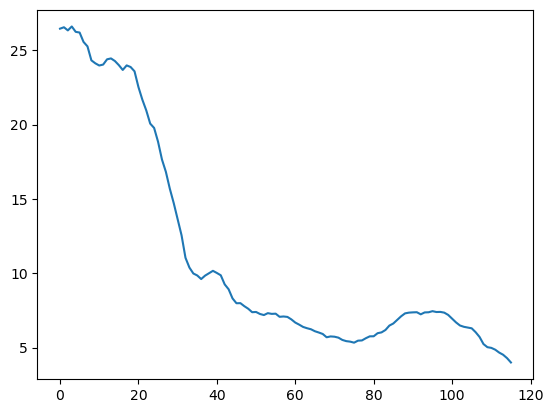

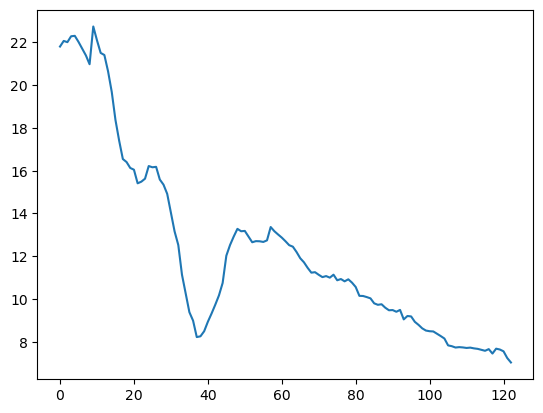

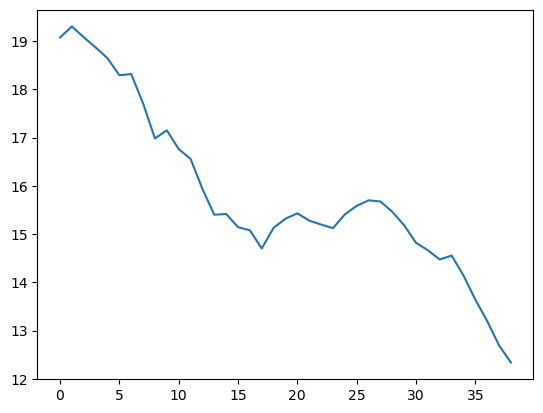

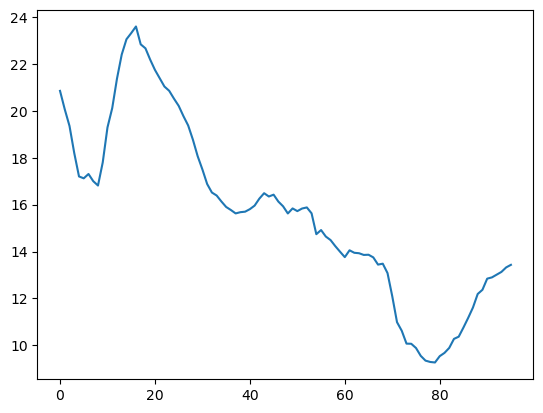

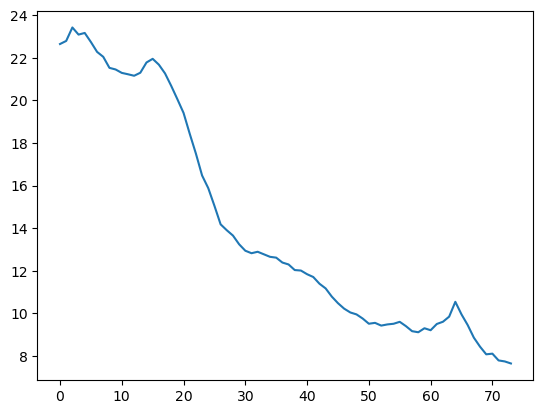

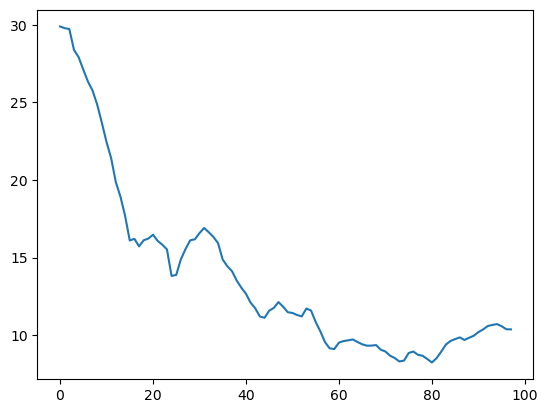

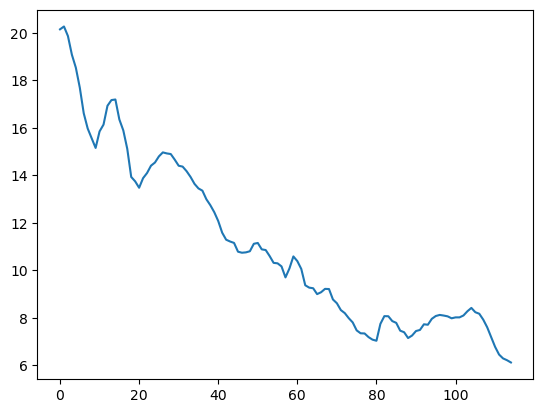

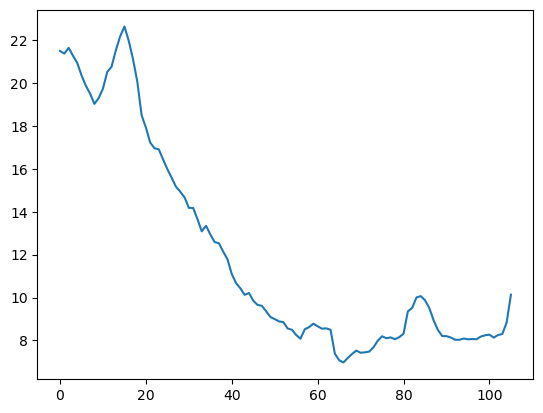

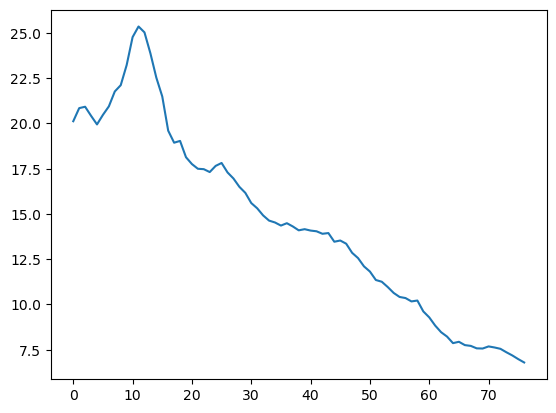

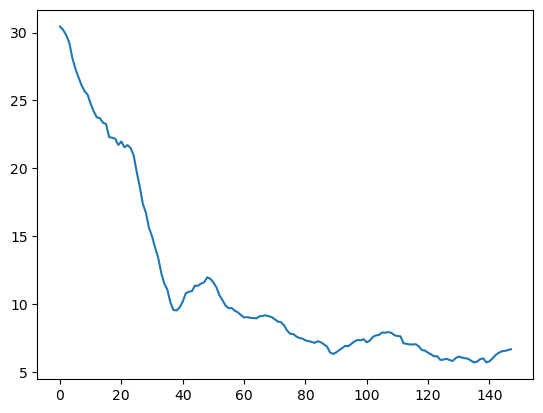

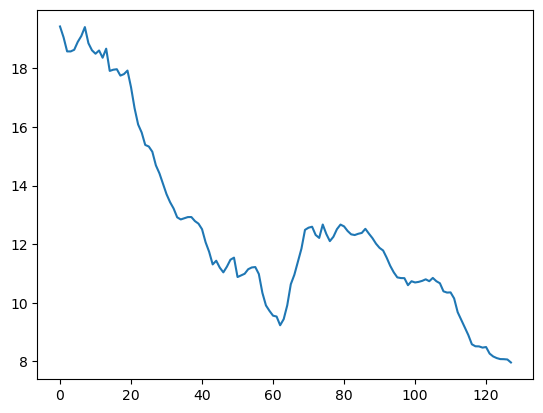

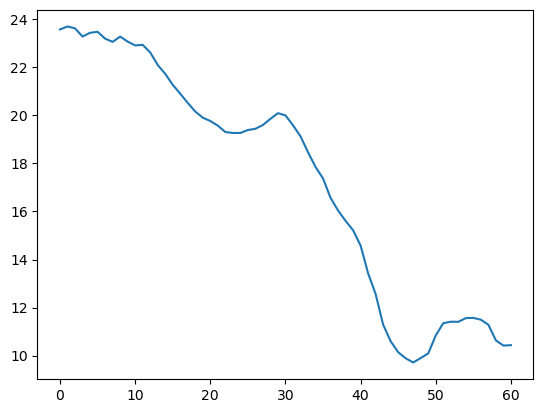

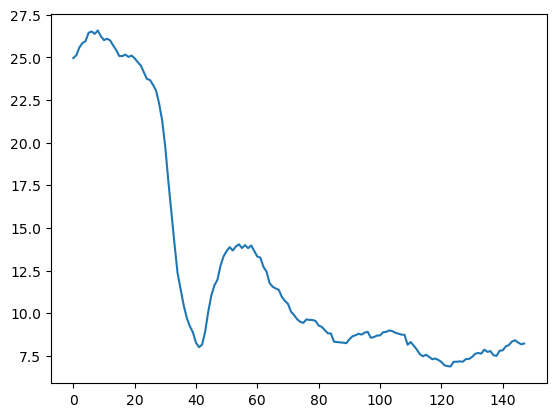

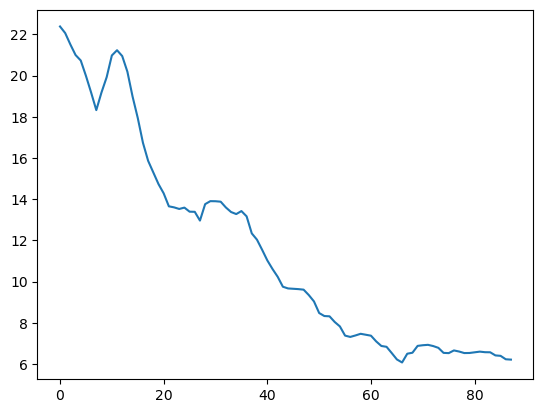

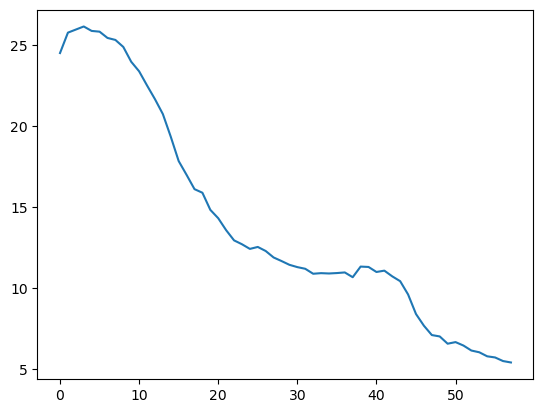

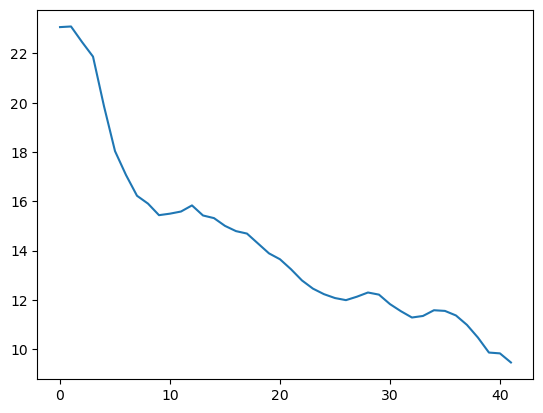

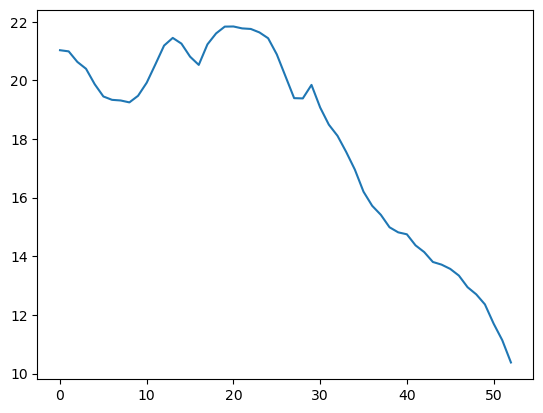

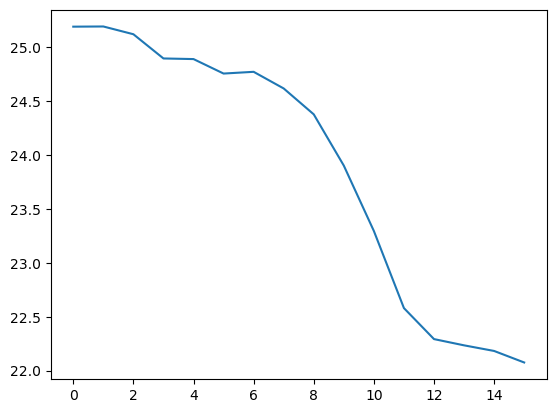

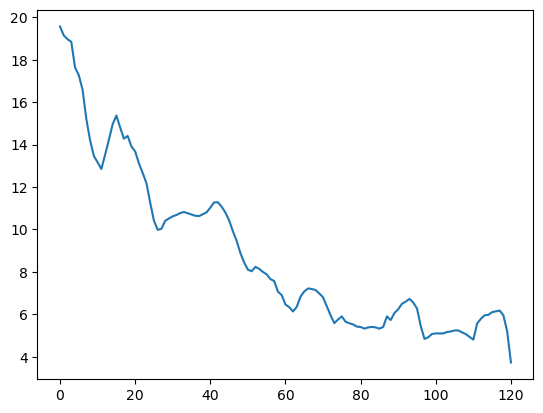

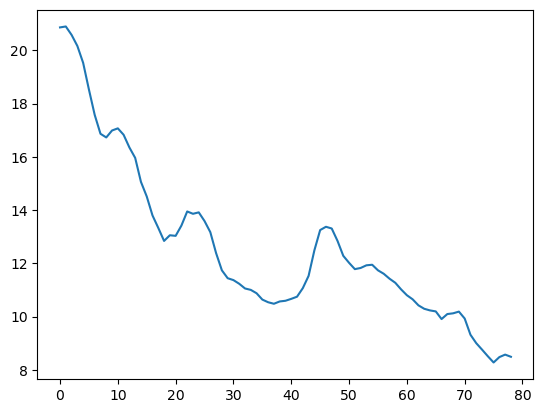

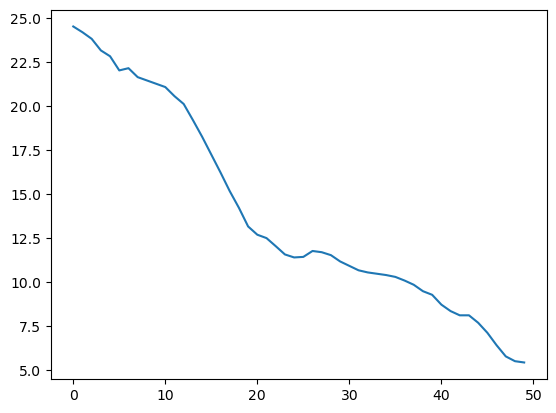

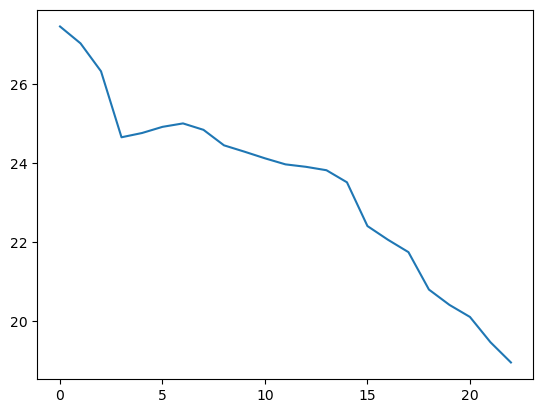

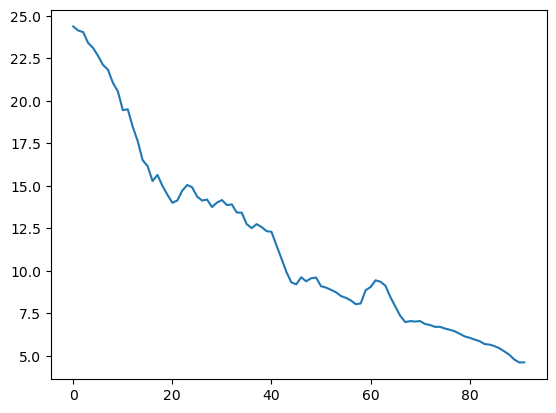

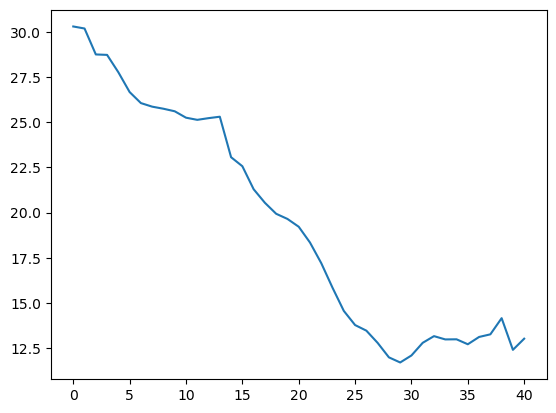

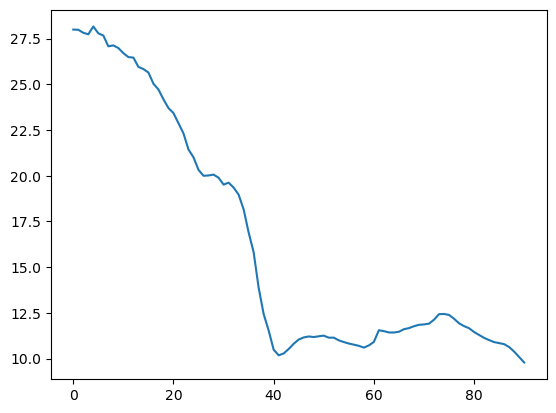

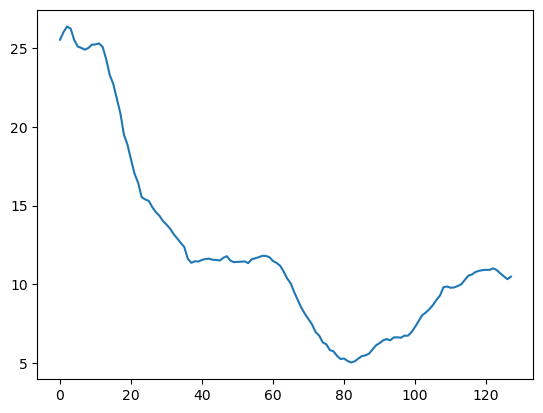

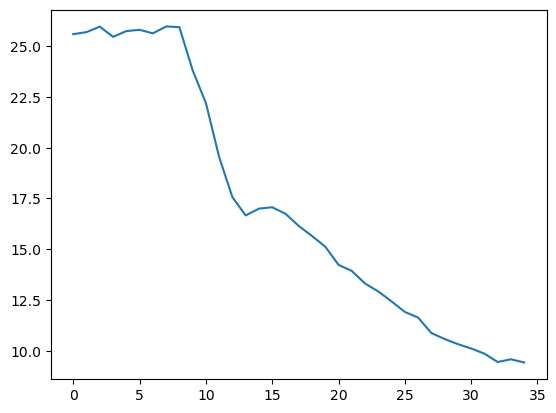

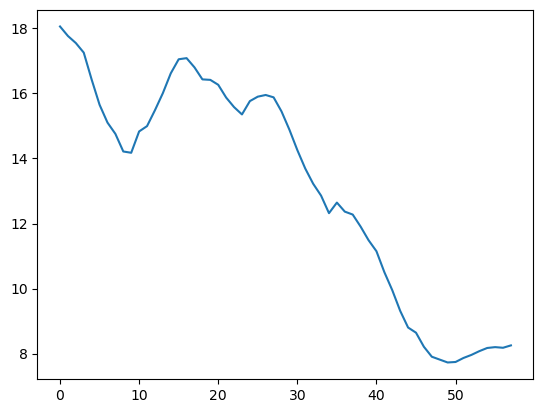

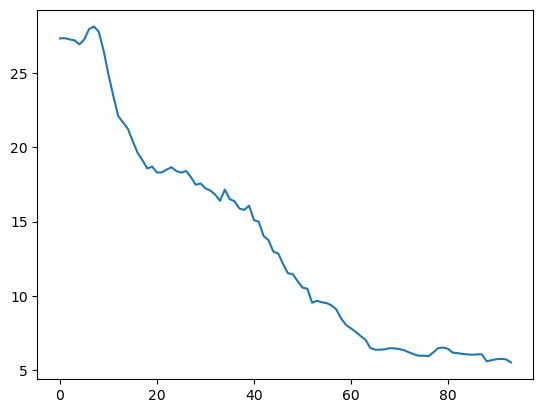

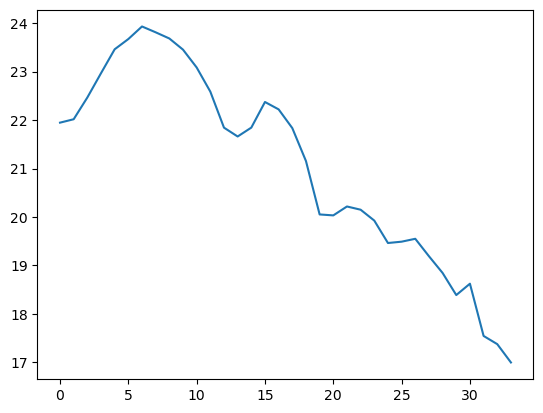

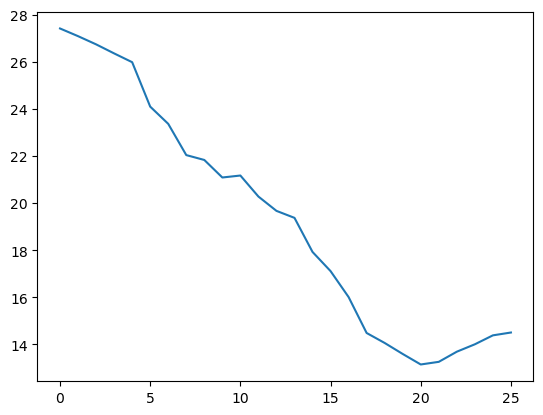

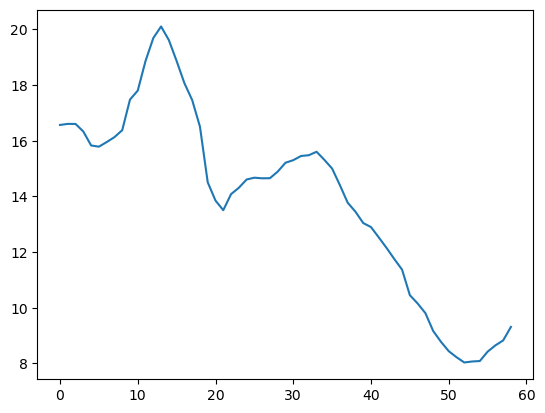

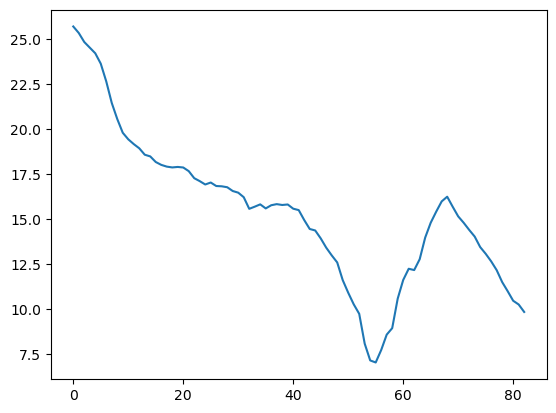

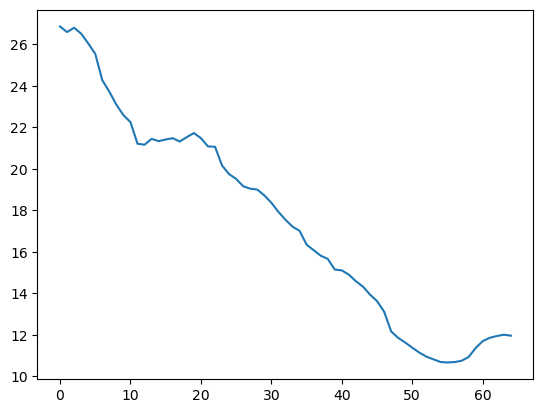

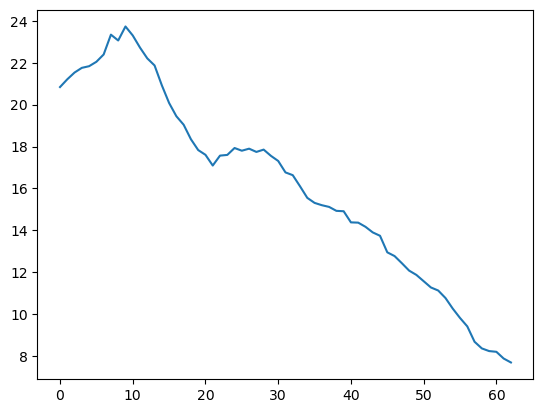

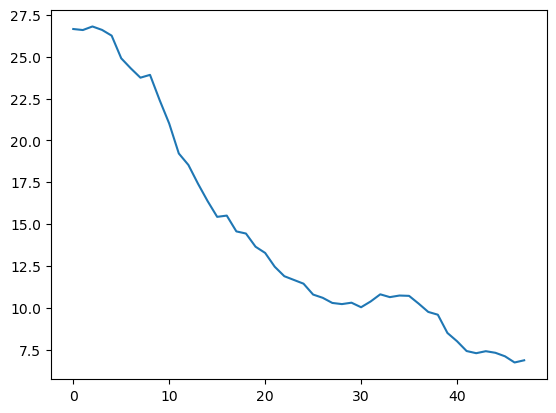

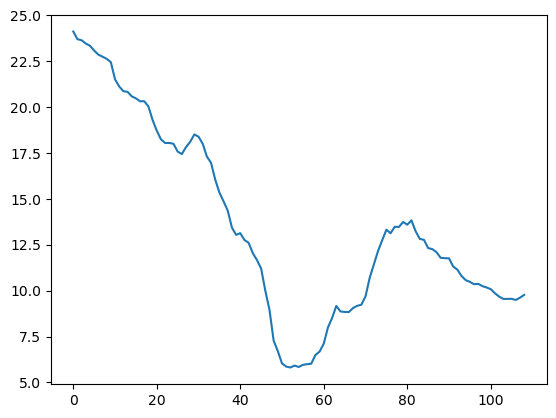

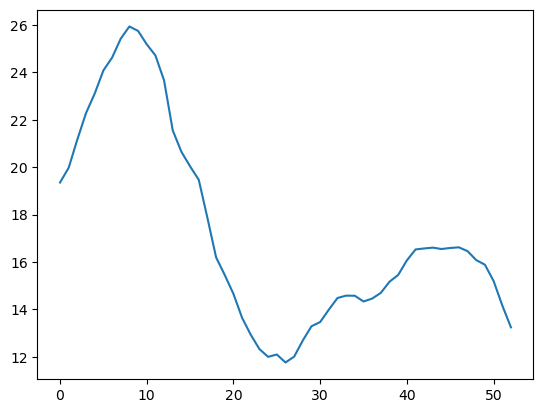

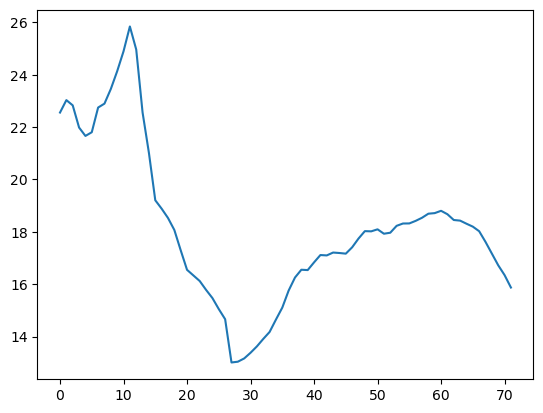

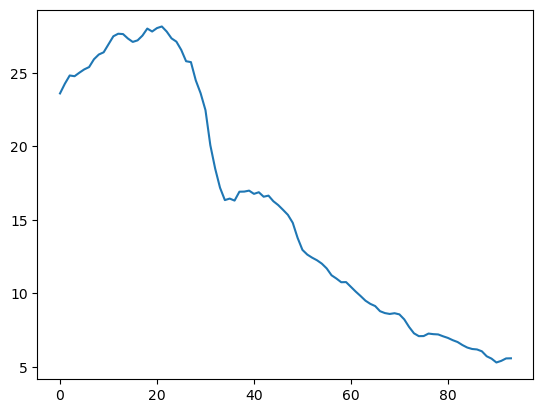

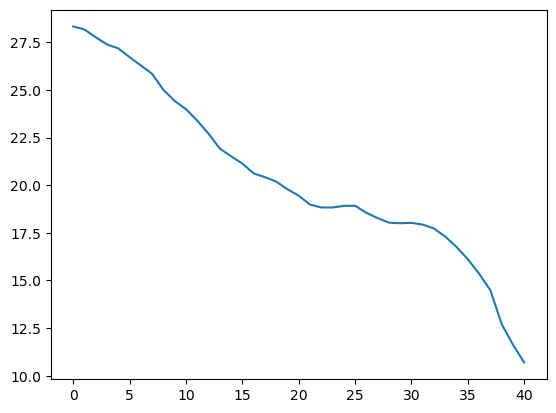

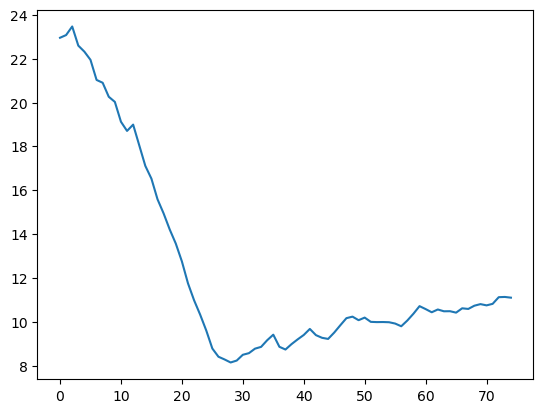

In [21]:
# plot the first storm of the y_train to be sure it is the right variable

import matplotlib.pyplot as plt
for i in range(0,len(y_train)):
    plt.plot(y_train[i,:])
    plt.show()

# it works !

In [67]:
# save the data using pickle

if dataset == 'datasets_1h_EU':
    step = '1h'
else:
    step = '3h'

np.save(f'{path}DATASETS/X_y_EU_{step}/X_train.npy', X_train)
np.save(f'{path}DATASETS/X_y_EU_{step}/X_validation.npy', X_validation)
np.save(f'{path}DATASETS/X_y_EU_{step}/X_test.npy', X_test)

np.save(f'{path}DATASETS/X_y_EU_{step}/y_train.npy', y_train)
np.save(f'{path}DATASETS/X_y_EU_{step}/y_validation.npy', y_validation)
np.save(f'{path}DATASETS/X_y_EU_{step}/y_test.npy', y_test)

In [37]:
# check if the data is saved correctly
import numpy as np

X_train = np.load(f'{path}DATASETS/X_y_EU_{step}/X_train.npy')
X_validation = np.load(f'{path}DATASETS/X_y_EU_{step}/X_validation.npy')
X_test = np.load(f'{path}DATASETS/X_y_EU_{step}/X_test.npy')

y_train = np.load(f'{path}DATASETS/X_y_EU_{step}/y_train.npy')
y_validation = np.load(f'{path}DATASETS/X_y_EU_{step}/y_validation.npy')
y_test = np.load(f'{path}DATASETS/X_y_EU_{step}/y_test.npy')


For storm one after another

In [44]:
datatype = ['train','validation','test']

for dtype in datatype:
    locals()[f'X_{dtype}_2'] = locals()[f'X_{dtype}'].reshape(locals()[f'X_{dtype}'].shape[0]*185, 79)
    locals()[f'XX_{dtype}_2'] = locals()[f'X_{dtype}_2'][~np.isnan(locals()[f'X_{dtype}_2']).any(axis=1)]

    locals()[f'y_{dtype}_2'] = locals()[f'y_{dtype}'].reshape(locals()[f'y_{dtype}'].shape[0]*185, 1)
    locals()[f'yy_{dtype}_2'] = locals()[f'y_{dtype}_2'][~np.isnan(locals()[f'y_{dtype}_2']).any(axis=1)]


In [45]:
# save them in the same folder

if dataset == 'datasets_1h_EU':
    step = '1h'
else:
    step = '3h'

np.save(f'{path}DATASETS/X_y_EU_{step}/X_train_2.npy', XX_train_2)
np.save(f'{path}DATASETS/X_y_EU_{step}/X_validation_2.npy', XX_validation_2)
np.save(f'{path}DATASETS/X_y_EU_{step}/X_test_2.npy', XX_test_2)

np.save(f'{path}DATASETS/X_y_EU_{step}/y_train_2.npy', yy_train_2)
np.save(f'{path}DATASETS/X_y_EU_{step}/y_validation_2.npy', yy_validation_2)
np.save(f'{path}DATASETS/X_y_EU_{step}/y_test_2.npy', yy_test_2)